<a href="https://colab.research.google.com/github/rmonro12/Intro_to_ML/blob/main/Homework_Assignments/HW_1/Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ryan Monroe (801219572) - 09/12/2025 <br>
ECGR 4105 - Homework 1, Problem 2

In [188]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [189]:
#Import .csv dataset from class repository
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/D3.csv'
df = pd.read_csv(url)

#Confirm successful import by printing
print(df.head())

         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


In [190]:
#Extrapolate data from .csv file
X1 = df.values[:, 0]
X2 = df.values[:, 1]
X3 = df.values[:, 2]
Y = df.values[:, 3]
m = len(Y) #number of training examples
n = len(X1)

In [191]:
#Reorganize data into matrix capable of multiplication
#Create column vector of all 1's
X0 = np.ones((n, 1))

#Start by transposing input vectors
X1 = X1.reshape(n, 1)
X2 = X2.reshape(n, 1)
X3 = X3.reshape(n, 1)

#Stack each vector to form input matrix
X = np.hstack((X0, X1, X2, X3))

#Preview the first 3 rows of the new matrix
print(X[:3])

[[1.         0.         3.44       0.44      ]
 [1.         0.04040404 0.1349495  0.88848485]
 [1.         0.08080808 0.82989899 1.3369697 ]]


In [192]:
#Set parameters for training
theta = [0., 0., 0., 0.] #4 theta values, 0 - 3
iterations = 300 #set number of loops
alpha = 0.1 #learning ratio 0.1 - 0.01

In [193]:
#Define the cost fucntion discussed in class
def cost_function(X, Y, theta):
  """
  Calculates the cost function for linear regression
  Input:
    X: Input feature matrix including X0
    Y: Epected output variable vector
    theta: The weights/fitting parameters vector
  Output:
    Calculated cost 'J'
  """
  h_x = X.dot(theta) #X dot product theta gives matrix of predicted output
  J = (1/(2*m)) * np.sum(np.square(h_x - Y)) #formula for J (given)

  return J

In [194]:
#Define gradient descent function discussed in class
def gradient_descent(X, Y, theta, alpha, iterations):
    """
    Calculates the gradient descent to find ideal theta values
    Input:
      X: Input feature matrix
      Y: Expected output vector
      theta: array of weights/fitting parameters
      alpha: learning rate (scalar value)
      iterations: number of loops to run (scalar value)
    Output:
      theta: updated value for each weight/fitting parameter
      cost_history: tracks the cost over time for each iteration
      """
    cost_history = np.zeros(iterations) #initialize vector with zeros

    for i in range(iterations): #loop for each iteration
        h_x = X.dot(theta) #calculate predicted output
        gradient = X.transpose().dot(np.subtract(h_x, Y)) / m #gradient of J
        theta = theta - alpha * gradient #update theta values
        cost_history[i] = cost_function(X, Y, theta)

    return theta, cost_history

Final values of theta = [ 5.057 -1.967  0.575 -0.228]
Final cost = 0.742


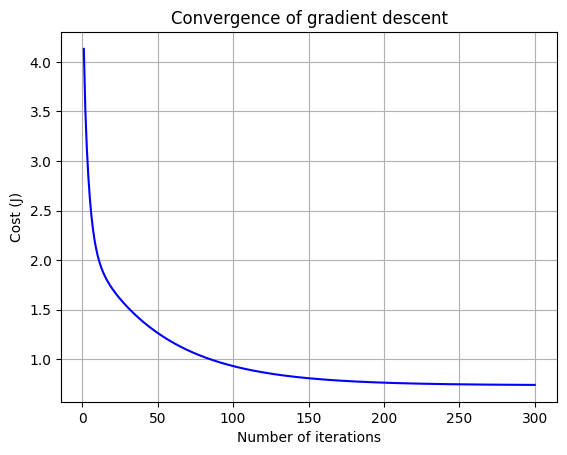

In [195]:
#Display results for parameter X
theta, cost_history = gradient_descent(X, Y, theta, alpha, iterations)
print('Final values of theta =', np.round(theta[:], 3))
print('Final cost =', round(cost_history[-1], 3))

#Plot cost over time
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()

In [196]:
#Predict output with unseen inputs
"""
New input values are:
(1, 1, 1)
(2, 0, 4)
(3, 2, 1)

They must be properly formatted when placed in an array!
"""
X_new = [[1., 1., 2., 3.], #New set of unseen inputs with leading ones for X0
         [1., 1., 0., 2.],
         [1., 1., 4., 1.]]
X_new = np.array(X_new) #convert list to array for matrix multiplication
Y_new = X_new.dot(theta) #calculate new output using found theta values
Y_new = np.round(Y_new, 3) #round to 3 decimal places
print("Predicted output 1 is: ", Y_new[0])
print("Predicted output 2 is: ", Y_new[1])
print("Predicted output 3 is: ", Y_new[2])

Predicted output 1 is:  3.556
Predicted output 2 is:  2.634
Predicted output 3 is:  5.162


Converting the problem to have 3 features instead of 1 was quite simple. Using the np.hstack function it was easy to create a 3 dimensional feature matrix by stacking them all together. From there, both the cost and gradient functions did not have to be adjusted.
<br><br>
Visualizing the four dimensional data is difficult, however, we can analyze the cost reduction per iteration. The graph shows a steep decline until slowing around 150 iterations and settles around 800. The learning rate and number of iterations can be adjusted to more quickly reach a similar cost but if adjust too far could cause overshoot and instability in the model.
<br><br>
After some testing I found that 300 iterations at a learning rate of 0.1 produced a final cost of 0.742. At this level increasing the iterations does not take any measurable amount of time more, but the returns are diminishing past this point.